In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
shopping_df = pd.read_csv('online_shoppers_intention.csv')
shopping_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
shopping_df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [4]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
def data_proflileing(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [6]:
data_proflileing(shopping_df)

,column,dtype,nunique,null,duplicates
0,Administrative,int64,27,0,12303
1,Administrative_Duration,float64,3335,0,8995
2,Informational,int64,17,0,12313
3,Informational_Duration,float64,1258,0,11072
4,ProductRelated,int64,311,0,12019
5,ProductRelated_Duration,float64,9551,0,2779
6,BounceRates,float64,1872,0,10458
7,ExitRates,float64,4777,0,7553
8,PageValues,float64,2704,0,9626
9,SpecialDay,float64,6,0,12324


In [7]:
shopping_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### EDA

<Axes: xlabel='Revenue', ylabel='count'>

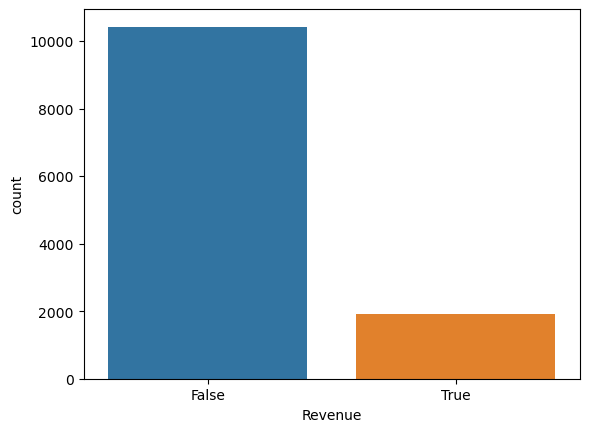

In [8]:

sns.countplot(x="Revenue",data=shopping_df)

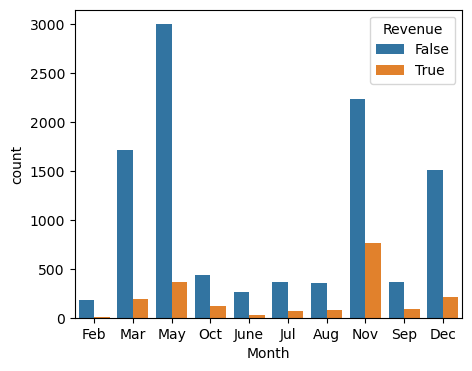

In [9]:
fig, axs = plt.subplots(figsize=(5,4))
g = sns.countplot(x='Month', data=shopping_df, ax=axs, hue='Revenue')

The Months with most online sessions are March, May, November and December. This may be caused by the important holiday, and special days in these months like:
Woman's Day (Mar)
Mother's day (May)
Brack Friday, and Thanks Giving (Nov)
Christmas , and Happy New Year (Dec)

In [10]:
shopping_df[['SpecialDay','Month','Revenue']].groupby('Month').sum()

,SpecialDay,Revenue
Month,,
Aug,0.0,76
Dec,0.0,216
Feb,43.0,3
Jul,0.0,66
June,0.0,29
Mar,0.0,192
May,714.4,365
Nov,0.0,760
Oct,0.0,115


In [11]:
pd.crosstab(shopping_df['Weekend'],shopping_df['Revenue'], margins=True)

Revenue,False,True,All
Weekend,,,
False,8053,1409,9462
True,2369,499,2868
All,10422,1908,12330


## Data Cleaning and Feature Engineering

In [12]:
shopping_clean = shopping_df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [13]:
visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [14]:
shopping_clean_merged.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False,0,1


In [16]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

## Splitting into train and test set

In [17]:
X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Splitting into train and test set

In [20]:
SM_os=SMOTETomek()

In [21]:
X_train_smtk,y_train_smtk=SM_os.fit_resample(X_train,y_train)

In [22]:
print(X_train_smtk.shape)

(14228, 12)


In [23]:
print(y_train_smtk.shape)

(14228,)


## Scaling of numerical columns

In [24]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [30]:
X_train_smtk=sc.fit_transform(X_train_smtk)
X_test=sc.transform(X_test)


## Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


In [33]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()
    
    algos = [g,b,kc,lr,dc,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]
    
    result = pd.DataFrame(index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))
        
        
        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))
        
    
    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall    
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
        
    return result.sort_values('Test_Accuracy Score', ascending=False)

In [34]:
classalgo_test(X_train_smtk,X_test,y_train_smtk,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
RandomForestClassifier,0.999719,1.000000,0.999719,0.999719,0.880238,0.591667,0.657915,0.880238,0.823380
BaggingClassifier,0.975822,0.975021,0.975843,0.975822,0.879697,0.595029,0.646545,0.879697,0.809579
XGBClassifier,0.994658,0.996753,0.994647,0.994658,0.878075,0.591988,0.638911,0.878075,0.802942
GradientBoostingClassifier,0.919455,0.909890,0.920383,0.919455,0.874561,0.572172,0.654762,0.874561,0.829952
LogisticRegression,0.846640,0.897101,0.836235,0.846640,0.873750,0.576705,0.634871,0.873750,0.805348
AdaBoostClassifier,0.907858,0.900483,0.908698,0.907858,0.873479,0.568678,0.654357,0.873479,0.831440
DecisionTreeClassifier,0.999719,1.000000,0.999719,0.999719,0.845364,0.502041,0.563359,0.845364,0.762291
KNeighborsClassifier,0.921563,0.897851,0.923833,0.921563,0.815085,0.440176,0.539704,0.815085,0.767070
BernoulliNB,0.760753,0.737943,0.771697,0.760753,0.729657,0.341062,0.476987,0.729657,0.755517
GaussianNB,0.677678,0.617015,0.744028,0.677678,0.501217,0.222707,0.356021,0.501217,0.658587
